Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import the necessary data frames

In [3]:
cab= pd.read_csv(r"E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Cab_Data.csv")
city=pd.read_csv(r"E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\City.csv")
customer= pd.read_csv(r"E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Customer_ID.csv")
transaction =pd.read_csv(r"E:\2020\PERSONAL\Data Glacier\Week 2 Cab EDA\DataSets-main\Transaction_ID.csv")

In [4]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
#Get the number of rows, columns for each dataset
print ("cab",cab.shape)
print ("transaction",transaction.shape)
print ("customer",customer.shape)


cab (359392, 7)
transaction (440098, 3)
customer (49171, 4)


In [9]:
#Exploration on data relationships:Correlation
#Table below shows a high correlation between the 'price charged' and the 'cost of the trip' and 'KM travelled'
cab_corr=cab.corr()
cab_corr

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000


The next cell visualizes the heatmap for all the variablesin the data set.
From the scale on the right,color red os at 0 meaning it represents weak correlation.
color blue is at 1 meaning it represents strong correlation. 
therefore we can see a strong correlation between Price charged and the KM travelled and the cost of the trip.

<AxesSubplot:>

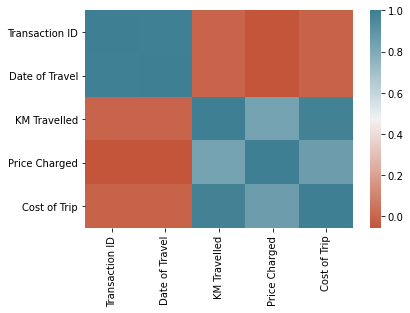

In [10]:
#Visualize the correlation matrix using a heatmap
cab_hm= sns.heatmap(cab_corr
                   ,cmap=sns.diverging_palette(20, 220, n=200))
cab_hm

The next cell will be merging two data sets;Transaction_ID and Cab_Data. the process will be carried out with a full outer merge because the two datasets have a common column:'Transaction ID'.A full outer merge combines both tables without losing any columns.

In [11]:
new=pd.merge(cab, transaction)
new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [12]:
new.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card


We find correlationof the merged dataset

In [13]:
new.corr(method='spearman')

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID
Transaction ID,1.000000,0.995275,-0.001470,-0.040401,-0.003537,-0.020391
Date of Travel,0.995275,1.000000,-0.001541,-0.041547,-0.004246,-0.019489
KM Travelled,-0.001470,-0.001541,1.000000,0.892958,0.984546,0.000428
Price Charged,-0.040401,-0.041547,0.892958,1.000000,0.913581,-0.204821
Cost of Trip,-0.003537,-0.004246,0.984546,0.913581,1.000000,-0.009639
Customer ID,-0.020391,-0.019489,0.000428,-0.204821,-0.009639,1.000000


In [14]:
customer.corr(method='pearson')


,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income (USD/Month),-0.006911,0.000156,1.000000


In [15]:
customer.corr(method='spearman')

,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.004956,-0.007843
Age,-0.004956,1.000000,0.000552
Income (USD/Month),-0.007843,0.000552,1.000000


Search for and remove null variables

In [16]:
nulls=new.isnull()
nulls

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False


In [17]:

new.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [18]:
new.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000


Plot a line graph showing the linear relationship between kilometers travelled and the price charged per ride for both taxi companies

In [19]:
#Graph plots
df=('x'=new[KM Travelled], 'y'=new [Price Charged])

#line plots
plt.plot({df['x'], df['y'], color=blue})
plt.legend()
plt.show()
#df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
#plt.plot([[KM Travelled], [Price Charged], color='blue'])
#plt.legend()
#plt.show()

SyntaxError: invalid syntax (<ipython-input-19-265b4248a1f3>, line 2)

In [ ]:
#Graph plots
df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
df.plt.plot([KM Travelled], [Price Charged], color='blue')
plt.legend()
plt.show()

In [ ]:
#df=pd.new({new,columns=[KM Travelled], [Price Charged]})

#line plots
new.plot.line(x='KM Travelled', y='Price Charged', color='blue')
plt.legend()
plt.show()

Perform a data split for x_test,x_train,y_test and y_train, for purposes of outlier detection, linear regression, training and testing.

In [ ]:
import matplotlib as mpl
line=f('Price Charged={intercept} +{slope}KM Travelled, {r})'
plt.plot(Price Charged, intercept + slope * KM Travelled)
plt.show()

Statement of hypothesis="KM travelled Affect the price charged by the cabs"
The above hypothesis is true since the pvalue is 0.

In [ ]:
from sklearn.linear_model import LinearRegression
x= new['KM Travelled']
y=new['Price Charged']
model=scipy.stats.linregress(x, y)
model


In [ ]:
scipy.stats.linRegress(x,y)
y_predict=predict(y)
y_pred

Statement of null hypothesis: "Cost of trip Affect the price charged by the cabs"

In [ ]:
a= new['Cost of Trip']

model3=scipy.stats.linregress(a,y)
model3

In [ ]:
a= new['Cost of Trip']
z=y-a
d=a+z
model3=scipy.stats.linregress(a,d)
model3

In [ ]:
plt.plot(a,d)
plt.show()

Statement ofnull hypothesis:"The Customer ID does not affect the price charged by the cabs"
    The hypothesis was proved true as the pvalue is 0.815832503608265

In [ ]:
b= new['Customer ID']

model4=scipy.stats.linregress(y, b)
model4

In [ ]:
plt.plot(x,y)
plt.show()

Prediction of price charged, based on cost of trip

In [ ]:
a= new['Cost of Trip']

model2=scipy.stats.linregress(y, a)
model2

In [ ]:
model.slope

In [ ]:
model.intercept

In [ ]:
line='y={intercept} +{slope}x, {r}'
line
plt.show(line)

In [ ]:
df= new[['Date of Travel','Cost of Trip','Price Charged']]
df.head()

In [ ]:
df['Date of Travel']=pd.to_datetime(df['Date of Travel'])  
df.head()

In [ ]:
#df.index=df['Date of Travel']
df.plot()


In [ ]:
cab.corr()

